In [1]:
# Library imports.
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import pathlib

### Load in station metadata.

In [2]:
# Column names.
columns = ['timestamp', 'station', 'district', 'freeway', 'travel_direction', 'lane_type', 'station_length', 'samples', 'perc_observed', 'total_flow', 
           'avg_occupancy', 'avg_speed', 'lane_n_samples', 'lane_n_flow', 'lane_n_avg_occ', 'lane_n_avg_speed', 'lane_n_obs']

# Station ID for east span of Bay Bridge.
station = 404920

# Number of lanes.
n_lanes = 5

In [3]:
# Path to directory containing PeMS data files.
path_to_data_directory = "C:\\Users\\anton\\Dropbox\\Cornell PhD\\Classes\\Fall24\\CEE6800\\HW\\HW2"
pems_files = pathlib.Path(path_to_data_directory).glob('*.txt')

# Load PeMS data into a temporary list.
pems_df_list = []
for pems_file in pems_files:
    print(pems_file)

    # Read in csv as a data frame.
    pems_df = pd.read_csv(pems_file, header=None)

    # Only retain necessary columns.
    pems_df = pems_df.iloc[:, :len(columns)]

    # Assign column names.
    pems_df.columns = columns

    # Convert timestamp column to timestamp.
    pems_df['timestamp'] = pd.to_datetime(pems_df['timestamp'])

    # Extract rows specific to the station.
    station_df = pems_df.loc[pems_df['station']==station, :]
    station_df.reset_index(inplace=True, drop=True)

    # Add to the list of data frames.
    pems_df_list.append(station_df)

# Concatenate station data frames.
station_df = pd.concat(pems_df_list)

print(station_df.head())

C:\Users\anton\Dropbox\Cornell PhD\Classes\Fall24\CEE6800\HW\HW2\d04_text_station_5min_2024_07_09.txt
C:\Users\anton\Dropbox\Cornell PhD\Classes\Fall24\CEE6800\HW\HW2\d04_text_station_5min_2024_07_16.txt
C:\Users\anton\Dropbox\Cornell PhD\Classes\Fall24\CEE6800\HW\HW2\d04_text_station_5min_2024_07_23.txt
C:\Users\anton\Dropbox\Cornell PhD\Classes\Fall24\CEE6800\HW\HW2\d04_text_station_5min_2024_07_30.txt
C:\Users\anton\Dropbox\Cornell PhD\Classes\Fall24\CEE6800\HW\HW2\d04_text_station_5min_2024_08_06.txt
C:\Users\anton\Dropbox\Cornell PhD\Classes\Fall24\CEE6800\HW\HW2\d04_text_station_5min_2024_08_13.txt
C:\Users\anton\Dropbox\Cornell PhD\Classes\Fall24\CEE6800\HW\HW2\d04_text_station_5min_2024_08_20.txt
C:\Users\anton\Dropbox\Cornell PhD\Classes\Fall24\CEE6800\HW\HW2\d04_text_station_5min_2024_08_27.txt
            timestamp  station  district  freeway travel_direction lane_type  \
0 2024-07-09 00:00:00   404920         4       80                W        ML   
1 2024-07-09 00:05:00   

In [4]:
station_df.head()

,timestamp,station,district,freeway,travel_direction,lane_type,station_length,samples,perc_observed,total_flow,avg_occupancy,avg_speed,lane_n_samples,lane_n_flow,lane_n_avg_occ,lane_n_avg_speed,lane_n_obs
0,2024-07-09 00:00:00,404920,4,80,W,ML,0.11,49,100,103.0,0.0154,72.0,10,16.0,0.0087,76.5,1
1,2024-07-09 00:05:00,404920,4,80,W,ML,0.11,50,100,98.0,0.0150,71.6,10,13.0,0.0075,76.3,1
2,2024-07-09 00:10:00,404920,4,80,W,ML,0.11,50,100,86.0,0.0122,71.9,10,14.0,0.0074,76.4,1
3,2024-07-09 00:15:00,404920,4,80,W,ML,0.11,50,100,97.0,0.0155,70.5,10,8.0,0.0043,76.4,1
4,2024-07-09 00:20:00,404920,4,80,W,ML,0.11,49,100,100.0,0.0154,70.9,10,11.0,0.0063,76.3,1


In [5]:
station_df.shape

(2304, 17)

In [6]:
station_df[["total_flow", "avg_speed", "avg_occupancy"]].head()

,total_flow,avg_speed,avg_occupancy
0,103.0,72.0,0.0154
1,98.0,71.6,0.0150
2,86.0,71.9,0.0122
3,97.0,70.5,0.0155
4,100.0,70.9,0.0154


### Extract flow, density, and velocity.

In [60]:
# Traffic flow,  Vehicles per 5 min
q = station_df["total_flow"].values / n_lanes

# Density.  Fraction of time a vehicle is present over detector
k = station_df["avg_occupancy"].values

# Speed. Miles per hour
v = station_df["avg_speed"].values

## Plot the fundamental diagram data

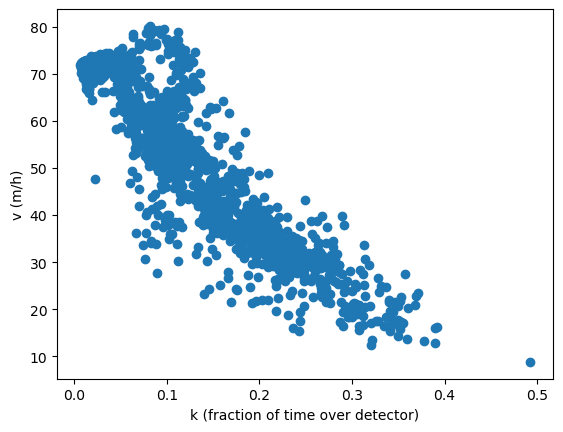

In [61]:
plt.scatter(k, v)
plt.xlabel("k (fraction of time over detector)")
plt.ylabel("v (m/h)")
plt.show()

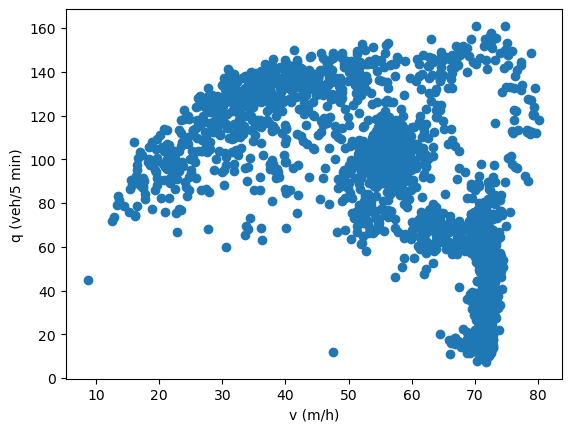

In [62]:
plt.scatter(v, q)
plt.xlabel("v (m/h)")
plt.ylabel("q (veh/5 min)")
plt.show()

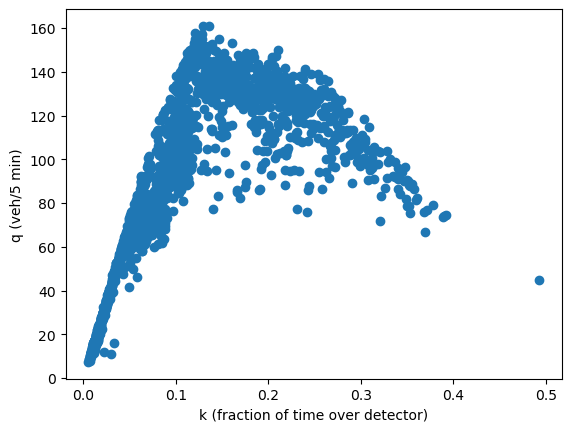

In [63]:
plt.scatter(k, q)
plt.xlabel("k (fraction of time over detector)")
plt.ylabel("q (veh/5 min)")
plt.show()

In [64]:
# v_free: flat v as a function of k
print(f"Free-flow speed estimate: v_free={v[k<0.015].mean():.1f} (m/h)")

Free-flow speed estimate: v_free=71.4 (m/h)


In [82]:
# k_max: congestion density, when v -> 0
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(k[k>0.2].reshape(-1, 1), q[k>0.2])

print(f"Congestion density estimate: k_max={-lr.intercept_/lr.coef_[0]:.2f} (fraction of time over detector)")

Congestion density estimate: k_max=0.67 (fraction of time over detector)


In [66]:
# k_c and q_c
k_c = k[np.argmax(q)]
q_c = q[np.argmax(q)]
print(f"Critical flow: q_c={q_c} (veh/5 min)")
print(f"Critical density: k_c={k_c} (fraction of time over detector)")

Critical flow: q_c=161.0 (veh/5 min)
Critical density: k_c=0.1355 (fraction of time over detector)


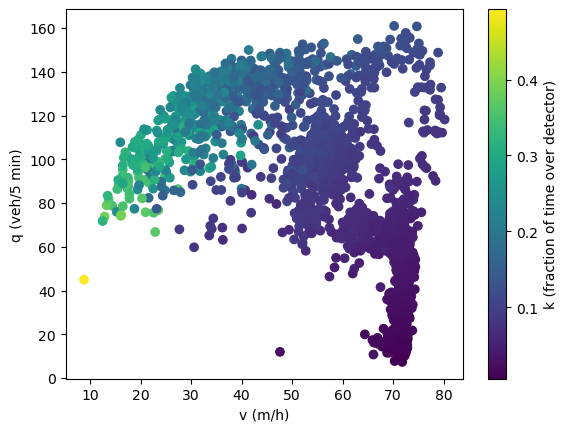

In [71]:
plt.scatter(v, q, c=k)
plt.colorbar(label="k (fraction of time over detector)")
plt.xlabel("v (m/h)")
plt.ylabel("q (veh/5 min)")
plt.show()

As we can see from \ref{fig:fund-diagram}, ...  

## Fit a fundamental diagram model to the data

### Triangular Model

In [193]:
# Estimate free-flow velocity.
v_free = v[k<0.015].mean()

# Estimate critical density.
k_crit = np.round(k[np.argmax(q)], 2) - 0.01

# Estimate maximum (jam) density.
k_max = 0.63

# Critical flow.
q_crit = q[np.argmax(q)]

# Flow as a function of density.
q_vs_k_model = lambda k: q_crit/k_crit * k if k <=k_crit else -q_crit/(k_max-k_crit) * (k-k_crit)  + q_crit

# g-factor.
g = v_free / (q_crit/k_crit)

In [198]:
k_pred = np.arange(0.01, k_max+0.01, 0.01)
q_pred = np.array([q_vs_k_model(k_val) for k_val in k_pred])

### Plot the model on top of the observations

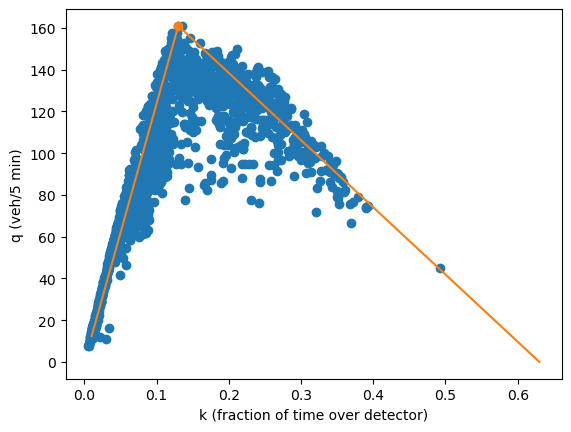

In [199]:
plt.scatter(k, q)
plt.scatter([k_crit], [q_crit])
plt.plot(k_pred, q_pred, color="C1")
plt.xlabel("k (fraction of time over detector)")
plt.ylabel("q (veh/5 min)")
plt.show()

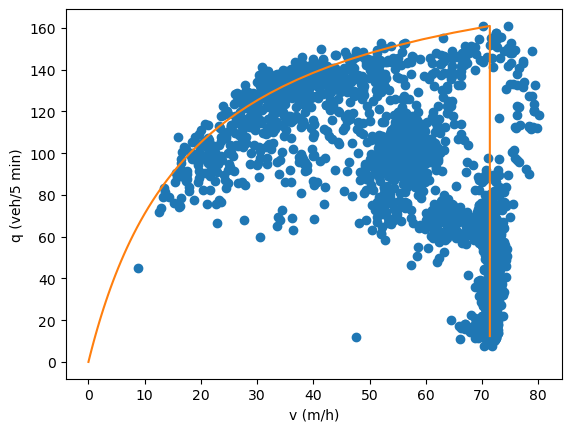

In [200]:
plt.scatter(v, q)
plt.plot(g*q_pred/k_pred, q_pred, color="C1")
plt.xlabel("v (m/h)")
plt.ylabel("q (veh/5 min)")
plt.show()

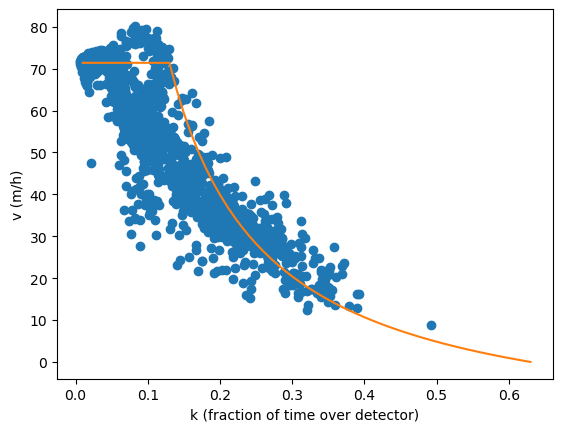

In [201]:
plt.scatter(k, v)
plt.plot(k_pred, g*q_pred/k_pred, color="C1")
plt.xlabel("k (fraction of time over detector)")
plt.ylabel("v (m/h)")
plt.show()